**KNN Project:**

In this project I have KNN algorithm to create a classification model that would predict target class. The data I used has variables which had no proper definitions, that is the reason I have used KNN as the classifier.

Importing python libraries that would be used for the problem.

In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Creating a pandas dataframe from the csv dataset and creating dataframe for target variable out of it

In [ ]:
df = pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df_y = df.pop('TARGET CLASS')
df_y.head()

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

Standardizing the independent variables for ease of use in KNN Algorithm

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
Std = StandardScaler()

In [8]:
Std.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
std_trans = Std.transform(df)

In [10]:
type(std_trans)

numpy.ndarray

In [11]:
df_x = pd.DataFrame(std_trans,columns=df.columns)

In [12]:
df_x.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Splitting Training and testing data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_x,test_x,train_y,test_y = train_test_split(df_x,df_y,test_size = 0.3,random_state =101)

In [19]:
test_y.head()

545    1
298    1
109    0
837    1
194    0
Name: TARGET CLASS, dtype: int64

Using Error Rate logic to find the right K value to use in algorithm

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
KNN = KNeighborsClassifier

In [21]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(train_x,train_y)
    pred_i = KNN.predict(test_x)
    error_rate.append(np.mean(pred_i!=test_y))

In [22]:
error_rate

[0.28,
 0.29,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.21,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16]

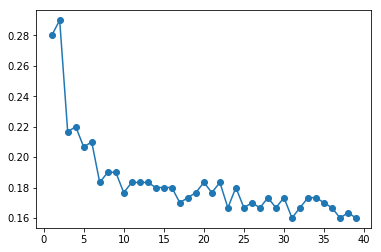

In [24]:
plt.plot(range(1,40),error_rate,marker = 'o',linestyle='-')

From the above plot, it is observed that K value 23 would be an appropriate

In [26]:
KNN = KNeighborsClassifier(n_neighbors=23)
KNN.fit(train_x,train_y)
pred_y = KNN.predict(test_x)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
print('for K = 23:')
print('\n')
print(confusion_matrix(test_y,pred_y))
print('\n')
print(classification_report(test_y,pred_y))

for K = 23:


[[124  28]
 [ 22 126]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       152
           1       0.82      0.85      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



**Finally, a classification model is developed that uses KNN algorithm which is accurate upto 83%**